In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import io
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

# 3. Data Collection

In [5]:
ds_asl_dir = r"C:\Users\Asus TUF\OneDrive\Documents\Cirtificates\asl_dataset"
#Generating a dataset
asl_ds = tf.keras.preprocessing.image_dataset_from_directory(ds_asl_dir)

Found 350 files belonging to 5 classes.


# 4. Data Preliminary Exploration

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

!ls "C:\Users\Asus TUF\OneDrive\Documents\Cirtificates\asl_dataset"
#Showing index + class

pd.DataFrame(asl_ds.class_names)

'ls' is not recognized as an internal or external command,
operable program or batch file.


,0
0,Cancel
1,Check_Account_Balance
2,Deposit_cash
3,Next
4,Withdraw_Cash


In [7]:


for image_batch, labels_batch in asl_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [9]:
#Displaying some picture´s size

from PIL import Image
img =  Image.open(r"C:\Users\Asus TUF\OneDrive\Documents\Cirtificates\asl_dataset\Check_Account_Balance\hand1_c_bot_seg_1_cropped.jpeg")
width, height = img.size
print(f"Image sample with width={width} and height={height}.")

Image sample with width=400 and height=400.


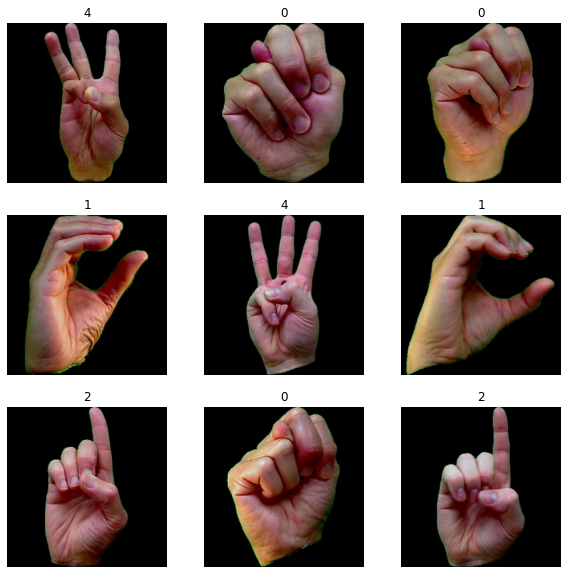

In [10]:
#Displaying image samples

plt.figure(figsize=(10, 10))
for images, labels in asl_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [11]:

import os
num_skipped = 0
for folder_name in ("Cancel","Check_Account_Balance","Deposit_cash","Next","Withdraw_Cash"):
    folder_path = os.path.join(ds_asl_dir, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()
        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)
print("Deleted %d images" % num_skipped)

Deleted 0 images


In [13]:
#Augmenting the images

from keras.preprocessing.image import ImageDataGenerator
data_augmentation = ImageDataGenerator(rotation_range=15, rescale=1/255, zoom_range=0.1, horizontal_flip=True,
                                       width_shift_range=0.1, height_shift_range=0.1, validation_split=0.2)

#Setting train/test split

asl_train_ds = data_augmentation.flow_from_directory(directory=r'C:\Users\Asus TUF\OneDrive\Documents\Cirtificates\asl_dataset', target_size=(64, 64),
                                                     class_mode="categorical", batch_size=64, subset="training")
asl_test_ds = data_augmentation.flow_from_directory(directory=r'C:\Users\Asus TUF\OneDrive\Documents\Cirtificates\asl_dataset', target_size=(64, 64),
                                                    class_mode="categorical", batch_size=64, subset="validation")

Found 280 images belonging to 5 classes.
Found 70 images belonging to 5 classes.


In [14]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D

In [19]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense

#Checking if the data format i.e the RGB channel is coming first or last so, whatever it may be, model will check first and then input shape will be feeded accordingly.

from keras import backend as K
if K.image_data_format() == "channels_first":
    input_shape = (3, 64, 64)
else:
    input_shape = (64, 64, 3)

#Creating a model

model_dl = keras.Sequential()
model_dl.add(Conv2D(16,(3,3),activation="relu",input_shape=(input_shape)))
model_dl.add(MaxPool2D(2,2))
model_dl.add(Dropout(0.2))
model_dl.add(Conv2D(32,(3,3),activation="relu"))
model_dl.add(MaxPool2D(2,2))
model_dl.add(Dropout(0.2))
model_dl.add(Conv2D(64,(3,3),activation="relu"))
model_dl.add(MaxPool2D(2,2))
model_dl.add(Dropout(0.2))
model_dl.add(Flatten())
model_dl.add(Dense(128,activation="relu"))
model_dl.add(Dropout(0.2))
model_dl.add(Dense(5,activation="softmax"))

In [ ]:
# from keras.callbacks import EarlyStopping,ReduceLROnPlateau #Import callback functions
# earlystop=EarlyStopping(patience=10) #Monitor the performance. If it dips, then stop training
# learning_rate_reduce=ReduceLROnPlateau(monitor='val_acc',min_lr=0.001) #Change learning rate if not performing good enough
# callbacks=[earlystop,learning_rate_reduce]

In [20]:
#Compiling the neural network

model_dl.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

#Fitting to the model

from keras.callbacks import EarlyStopping,ReduceLROnPlateau #Import callback functions
earlystop=EarlyStopping(patience=10) #Monitor the performance. If it dips, then stop training
learning_rate_reduce=ReduceLROnPlateau(monitor="val_acc",min_lr=0.001) #Change learning rate if not performing good enough
callbacks=[earlystop,learning_rate_reduce]

model_dl.fit(asl_train_ds, validation_data=asl_test_ds, callbacks=callbacks, epochs=10)

Epoch 1/10
5/5 [==============================] - 2s 338ms/step - loss: 1.5756 - accuracy: 0.2107 - val_loss: 1.5281 - val_accuracy: 0.5286
Epoch 2/10
5/5 [==============================] - 1s 254ms/step - loss: 1.4246 - accuracy: 0.3786 - val_loss: 1.3113 - val_accuracy: 0.5571
Epoch 3/10
5/5 [==============================] - 2s 302ms/step - loss: 1.1706 - accuracy: 0.4857 - val_loss: 1.0857 - val_accuracy: 0.6714
Epoch 4/10
5/5 [==============================] - 1s 292ms/step - loss: 0.9412 - accuracy: 0.6036 - val_loss: 0.8859 - val_accuracy: 0.5714
Epoch 5/10
5/5 [==============================] - 1s 296ms/step - loss: 0.6844 - accuracy: 0.7286 - val_loss: 0.7579 - val_accuracy: 0.7143
Epoch 6/10
5/5 [==============================] - 1s 250ms/step - loss: 0.7136 - accuracy: 0.6964 - val_loss: 0.7418 - val_accuracy: 0.6429
Epoch 7/10
5/5 [==============================] - 1s 236ms/step - loss: 0.5997 - accuracy: 0.7464 - val_loss: 0.6505 - val_accuracy: 0.7571
Epoch 8/10
5/5 [====

In [ ]:
#Saving the model
model_dl.save("model_dl.h5")
#Loading themodel
model_dl = keras.models.load_model("model_dl.h5") #look for local saved file

# 8. Model Deployment

In [ ]:
#We´ll use any image sample from the Kaggle dataset to test it 

from keras.preprocessing import image

#Creating a dictionary to map each of the indexes to the corresponding number or letter

# dict = {0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9",10:"Cancel",11:"Check_Account_Balance",12:"Deposit_cash",13:"Next",14:"Withdraw_Cash"}


#Predicting images

img = image.load_img("/content/drive/MyDrive/asl_dataset/Cancel/hand1_n_bot_seg_1_cropped.jpeg", target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
classes = model_dl.predict(image, batch_size=64)
# probabilities = model_dl.predict_proba(image, batch_size= 64)
# probabilities_formatted = list(map("{:.2f}%".format, probabilities[0]*100))

print(classes) #displaying matrix prediction position

# print(f'The predicted image corresponds to "{dict[classes.item()]}" with probability.') #displaying matrix prediction position name (number or letter)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
